# IMPORTS

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import os

# GRAPH and SESSION

In [2]:
# let's do an aritmatic with tensorflow.
# we will create two constants. and we will add them...
#------------------------------------------------------

# create constants
a = tf.constant(2)
b = tf.constant(3)

# add two constants
c = tf.add(a,b)
print(a+b)
print(c)

Tensor("add:0", shape=(), dtype=int32)
Tensor("Add:0", shape=(), dtype=int32)


In [3]:
# when we declare constants, variables, etc. they are tensors.
# that's why they call it tensorflow. The data that we declare flow in a graph
# in order to execute the graph we have to run a session
#------------------------------------------------------


# launch the graph in a session
with tf.Session() as sess:
	print(sess.run(c))

5


# CONSTANT

In [ ]:
# we saw that we can delcared constants and ran it...
# constants, as it speaks for itself, are used as constant value tensors.
# to change the value we can use variables or placeholders
#------------------------------------------------------

# create graph
a = tf.constant(2)
b = tf.constant(3)
c = a+b
# launch the graph in a session
with tf.Session() as sess:
	print(sess.run(c))

# VARIABLE

In [ ]:
# variables are tensors that we can change their value.
# they are usually used for weights and biases
# BUT, what is the difference in execution then?
#------------------------------------------------------

# create graph
a = tf.Variable(2)
b = tf.Variable(3)
c = a+b

# launch the graph in a session
with tf.Session() as sess:
    print(sess.run(c))

In [ ]:
# variables needs to be initialized.
# we have to invoke a variable initializer operation.
#------------------------------------------------------

# create graph
a = tf.Variable(2)
b = tf.Variable(3)
c = a+b
# add an Op to initialize global variables
init_op = tf.global_variables_initializer()

# launch the graph in a session
with tf.Session() as sess:
    # run the variable initializer
    sess.run(init_op)
    # now we can run our operations
    print(sess.run(c))

# PLACEHOLDER:


In [ ]:
# placeholders are tensors that are placed to hold the data.
# we can build our graph without needing the data (because data is huge).
# in the time of need, we can feed the data in the right place (guess what place ?!!)
#------------------------------------------------------

# create graph
# create a placeholder of type float 32-bit, value is a vector of 3 elements
a = tf.placeholder(tf.float32, shape=[3])
# create a constant of type float 32-bit, value is a vector of 3 elements
b = tf.constant([5, 5, 5], tf.float32)
c = a+b

# launch the graph in a session
with tf.Session() as sess:
    print(sess.run(c)) 


In [ ]:
# now what is the problem?
# placeholders are just holding the place... where should we feed the input?
# in a dictionaty called feed_dict:
#------------------------------------------------------


# launch the graph in a session
with tf.Session() as sess:
    # create a feed_dict:
    feed_dict={a: [1, 2, 3]}
    # feed it to placeholder a via the dict 
    print(sess.run(c, feed_dict=feed_dict)) 



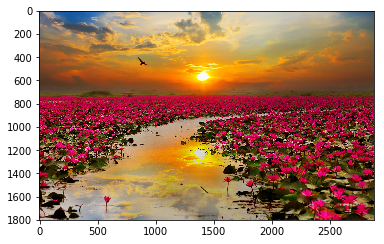

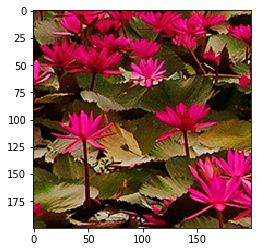

In [4]:
# ok. now let's see a cool example.
#------------------------------------------------------


# load the image
filename = 'flowers.jpg'
raw_image_data = mpimg.imread(filename)

# create a placeholder for the image
image = tf.placeholder(dtype="uint8", shape=[None, None, 3])
# slice the image 
slice = tf.slice(image, begin=[1000, 0, 0], size=[200, 200, -1])

# launch the graph in a session
with tf.Session() as session:
    result = session.run(slice, feed_dict={image: raw_image_data})

plt.imshow(raw_image_data)
plt.show()

plt.imshow(result)
plt.show()